In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import data

In [3]:
df = pd.read_csv('adventure_works_purchase_orders.csv')

In [4]:
df.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,...,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
0,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.0944,3374.99,0.0,1,51.3415
1,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.0944,3374.99,0.0,3,51.3415
2,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.0944,3374.99,0.0,1,51.3415
3,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.1544,3399.99,0.0,1,51.3415
4,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.1544,3399.99,0.0,1,51.3415


# Create new calculated columns and change the data type of some columns

In [5]:
df['Cost'] = (df['Unit_Freight_Cost'] * df['OrderQty']) + (df['OrderQty']*df['Unit_Cost'])

In [6]:
df['shipping'] = df['Unit_Freight_Cost'] * df['OrderQty']

In [7]:
def calculate_revenue(row):
    if (row['UnitPriceDiscount']== 0):
        return row['UnitPrice'] * row['OrderQty']
    else:
        return (row['UnitPrice'] * (1 - row['UnitPriceDiscount']))*row['OrderQty']

In [8]:
df['Revenue'] = df.apply(lambda row: calculate_revenue(row), axis =1 )

In [9]:
df['OrderDate'] = pd.to_datetime(df.OrderDate)

In [10]:
df['Profit'] = df['Revenue'] - df['Cost']

In [11]:
df['profit_per_item'] = df['Profit']/df['OrderQty']

In [12]:
df['month_year'] = df['OrderDate'].dt.to_period('M')

In [13]:
df['year'] = df['OrderDate'].dt.to_period('Y')

In [14]:
df['quarter'] = df['OrderDate'].dt.to_period('Q')

In [15]:
df.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,...,OrderQty,Unit_Freight_Cost,Cost,shipping,Revenue,Profit,profit_per_item,month_year,year,quarter
0,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,1,51.3415,1949.4359,51.3415,3374.99,1425.5541,1425.5541,2005-07,2005,2005Q3
1,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,3,51.3415,5848.3077,154.0245,10124.97,4276.6623,1425.5541,2005-07,2005,2005Q3
2,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,1,51.3415,1949.4359,51.3415,3374.99,1425.5541,1425.5541,2005-07,2005,2005Q3
3,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,1,51.3415,1963.4959,51.3415,3399.99,1436.4941,1436.4941,2005-07,2005,2005Q3
4,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,1,51.3415,1963.4959,51.3415,3399.99,1436.4941,1436.4941,2005-07,2005,2005Q3


### Calculate Number of Orders that had a greater unit freight cost than unit price

In [16]:
price_shipping = df[['Product_Category','Product_Name','UnitPrice','Unit_Freight_Cost','year']]

In [17]:
price_shipping.head()

,Product_Category,Product_Name,UnitPrice,Unit_Freight_Cost,year
0,Bikes,"Mountain-100 Black, 42",3374.99,51.3415,2005
1,Bikes,"Mountain-100 Black, 44",3374.99,51.3415,2005
2,Bikes,"Mountain-100 Black, 48",3374.99,51.3415,2005
3,Bikes,"Mountain-100 Silver, 38",3399.99,51.3415,2005
4,Bikes,"Mountain-100 Silver, 42",3399.99,51.3415,2005


In [18]:
price_shipping['Revenue'] = price_shipping['UnitPrice'] - price_shipping['Unit_Freight_Cost']

C:\Users\JAY\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
price_shipping.head()

,Product_Category,Product_Name,UnitPrice,Unit_Freight_Cost,year,Revenue
0,Bikes,"Mountain-100 Black, 42",3374.99,51.3415,2005,3323.6485
1,Bikes,"Mountain-100 Black, 44",3374.99,51.3415,2005,3323.6485
2,Bikes,"Mountain-100 Black, 48",3374.99,51.3415,2005,3323.6485
3,Bikes,"Mountain-100 Silver, 38",3399.99,51.3415,2005,3348.6485
4,Bikes,"Mountain-100 Silver, 42",3399.99,51.3415,2005,3348.6485


In [20]:
price_shipping['negative']= np.where(price_shipping['Revenue'] <0, 1, 0)

C:\Users\JAY\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
(price_shipping['negative'].sum()/len(price_shipping))*100

11.813580364817113

Make The Graphs

In [22]:
df['quarter'] = df['quarter'].astype(str)

In [23]:
overview = df.groupby(['quarter'], as_index=False).agg({"Revenue": "sum","Cost":"sum", "Profit":"sum", "shipping":"sum","OrderQty":"sum"})

In [24]:
product = df.groupby(['Product_Name','Product_Category'], as_index=False).agg({"profit_per_item": "mean"})

In [25]:
categories = df.groupby(['Product_Category'], as_index=False).agg({"profit_per_item": "mean"})

In [26]:
overview

,quarter,Revenue,Cost,Profit,shipping,OrderQty
0,2005Q3,4.350197e+06,2.729993e+06,1.620204e+06,221650.4139,3396
1,2005Q4,6.803143e+06,4.328230e+06,2.474913e+06,378136.4767,5035
2,2006Q1,5.592067e+06,3.535898e+06,2.056169e+06,280762.1310,3611
3,2006Q2,6.207956e+06,4.182490e+06,2.025466e+06,330380.3697,5017
4,2006Q3,1.163037e+07,7.650756e+06,3.979615e+06,846044.7814,19665
5,2006Q4,9.321496e+06,6.037810e+06,3.283686e+06,598059.6553,14333
6,2007Q1,7.036498e+06,4.557571e+06,2.478926e+06,422279.2000,9058
7,2007Q2,9.007347e+06,5.839996e+06,3.167350e+06,578876.1136,14136
8,2007Q3,1.245244e+07,8.549437e+06,3.903005e+06,988087.6210,24734
9,2007Q4,9.961928e+06,6.595762e+06,3.366166e+06,685704.2090,17772


In [27]:
((overview.iloc[11,5] - overview.iloc[7,5])/ overview.iloc[7,5])*100 #Calculate the percentage change of orders

20.790888511601587

In [28]:
((overview.iloc[11,3] - overview.iloc[7,3])/ overview.iloc[7,3])*100 #Calculate the percentage change of profit

-42.38582547005317

In [29]:
((overview.iloc[11,4] - overview.iloc[7,4])/ overview.iloc[7,4])*100 #Calculate the percentage change of shipping costs

15.678237012680013

In [241]:
categories.head()

,Product_Category,profit_per_item
0,Accessories,-13.754425
1,Bikes,541.589833
2,Clothing,-14.663571
3,Components,148.225408


Text(0, 0.5, 'Sales')

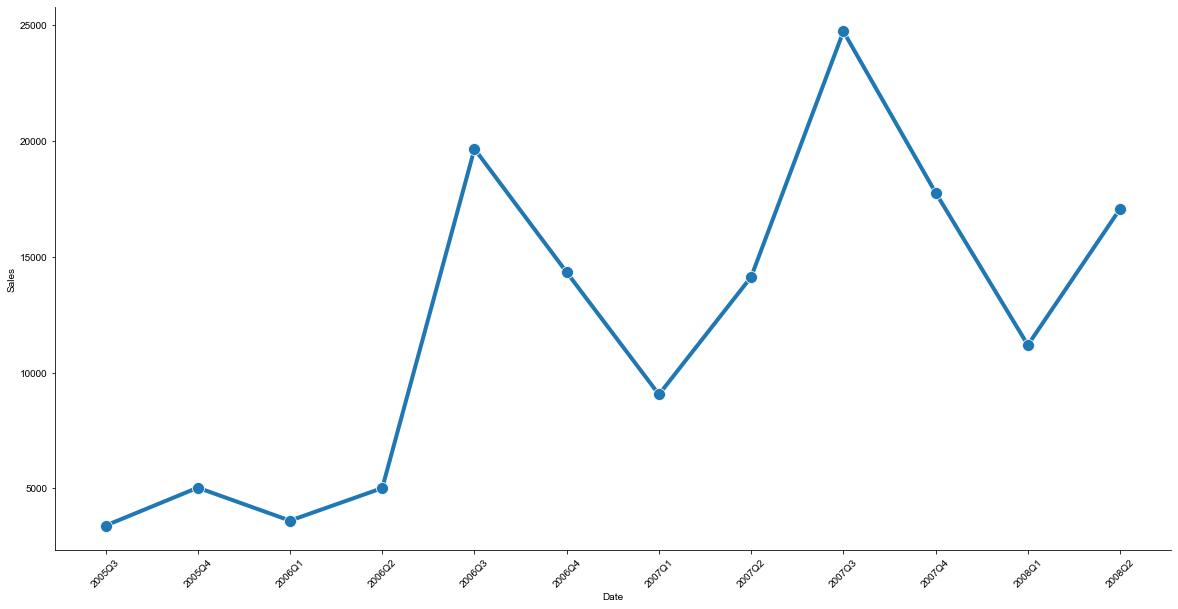

In [31]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
ax = sns.lineplot(x="quarter", y="OrderQty" ,palette="Purples" ,markers=True,marker='o', dashes=False,data=overview,  markersize=12, linewidth=4)
sns.set_style("white")
sns.despine()
plt.xlabel('Date')
plt.ylabel('Sales')

Text(0, 0.5, 'Profit')

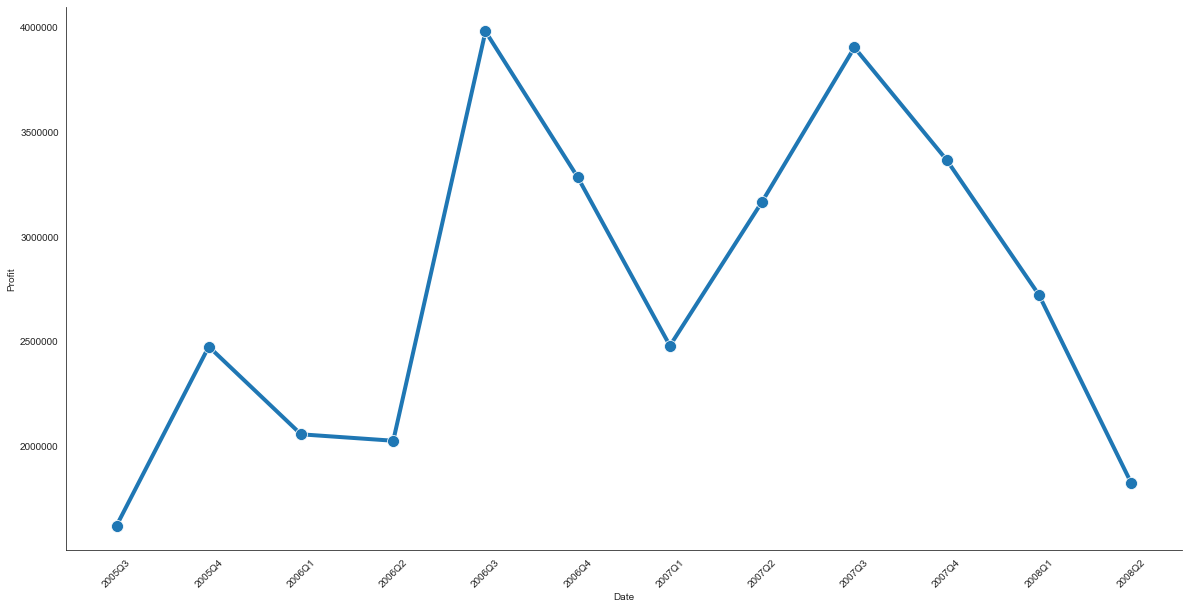

In [32]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
ax = sns.lineplot(x="quarter", y="Profit",palette="Purples" ,markers=True,marker='o', dashes=False,data=overview,  markersize=12, linewidth=4)
sns.set_style("white")
sns.despine()
plt.xlabel('Date')
plt.ylabel('Profit')

Text(0, 0.5, 'Shipping Cost')

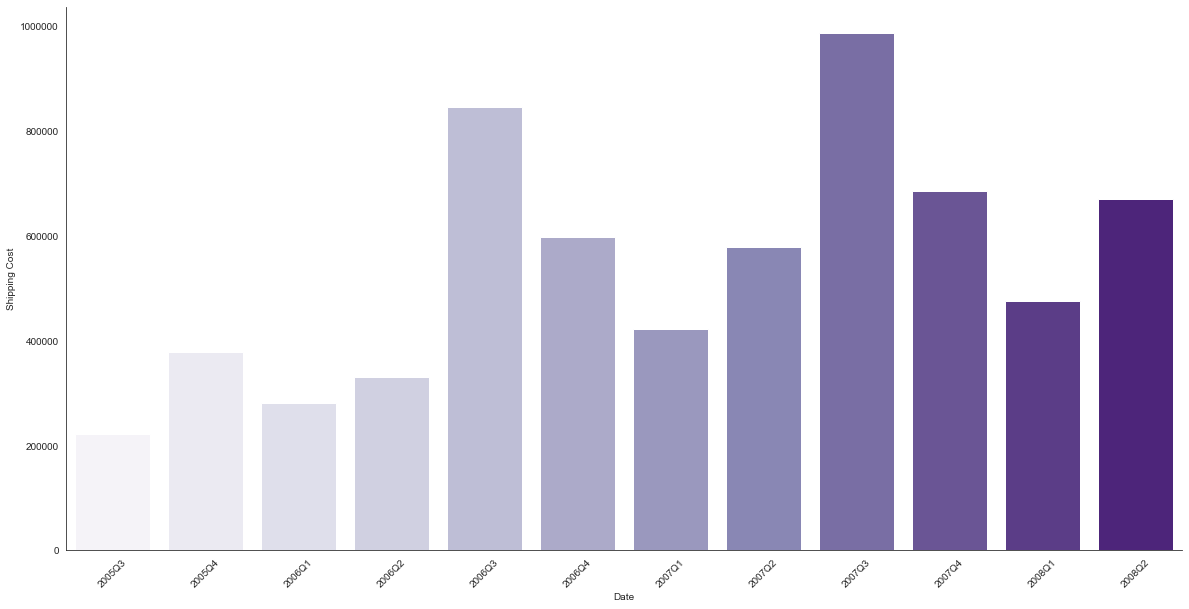

In [33]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
ax = sns.barplot(x="quarter", y="shipping",palette="Purples" , data=overview)
sns.set_style("white")
sns.despine()
plt.xlabel('Date')
plt.ylabel('Shipping Cost')

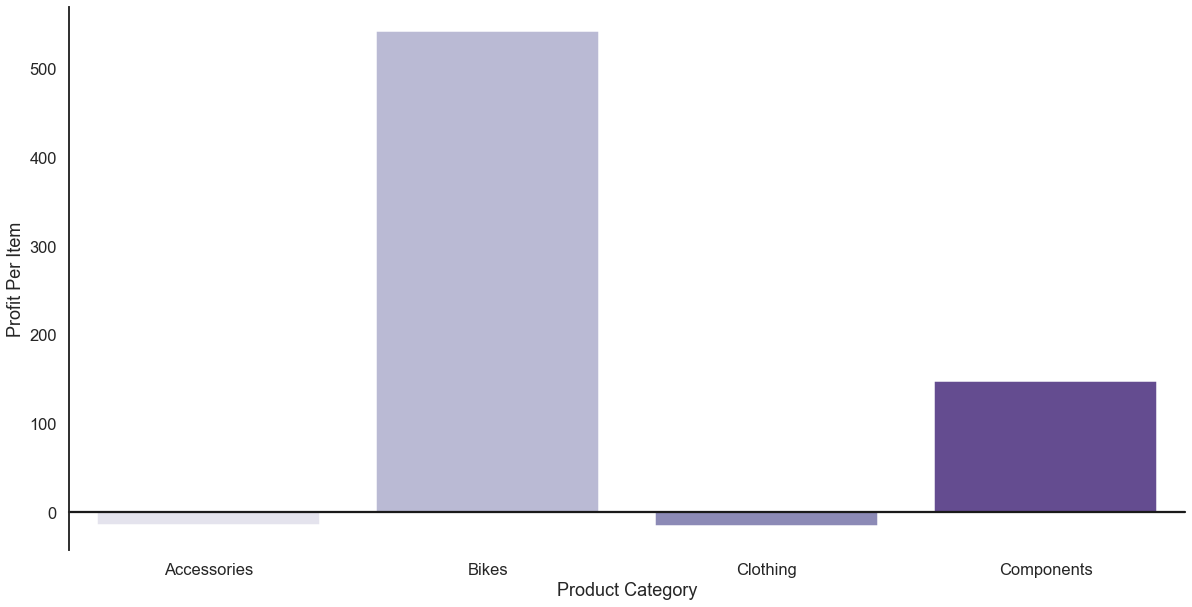

In [34]:
plt.figure(figsize=(20,10))
sns.set(style="white", context="talk")
chart = sns.barplot(x="Product_Category", y="profit_per_item", data=categories, palette="Purples")
chart.axhline(0, color="k", clip_on=False)
chart.set_ylabel("Profit Per Item")
chart.set_xlabel("Product Category")
sns.despine(bottom=True)